In [1]:
import numpy as np
import pandas as pd
import os
import scipy as sp
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import multivariate_normal

## 7.2 Naive Bayes Classification Model
- **Conditional Independece**
     - If Random variable of A and B are independent, 
          $$ P(A, B) = P(A)P(B) $$
          
     - If Random variable of C exists and follow the below, then it is conditional independence.
         $$ P(A, B|C) = P(A|C) P(B|C) $$
         
     - Symbolized as below,
         $$ A \text{⫫} B \;\vert\; C $$
     
     - general independance is actually, 
         $$ A \text{⫫} B \;\vert\; \emptyset $$
    - If A, B are conditional indepence with C, it will satisfy below,
        $$ P(A|B,C) = P(A|C) $$
        $$ P(B|A,C) = P(B|C) $$
    - Be aware that 
    
$$ P(A,B) = P(A)P(B) \;\; \bcancel{\implies} \;\; P(A,B|C) = P(A|C)P(B|C) $$

$$  P(A,B|C) = P(A|C)P(B|C) \;\; \bcancel{\implies} \;\; P(A,B) = P(A)P(B) $$

- Let's take a look on an example
    - Mother's weight: C (kg)
    - Son's weight: A (kg)
    - Daughter's weight: B (kg)
    - Normal Distributed
    - Standard Deviation: 5 (kg)
- From the simulation, we will make samples of A,B, and C.

In [2]:
np.random.seed(0)
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

- From the scatter plot, A and B have correlation. If C is fixed, the A and B are independent.

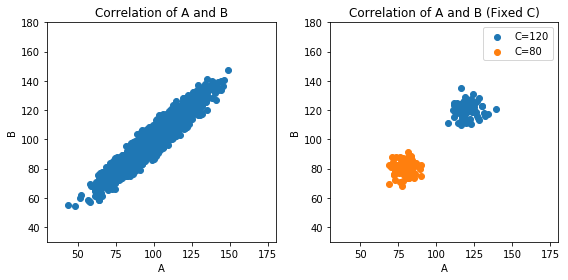

In [11]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(B,C)
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.title('Correlation of A and B')

plt.subplot(122)
idx1 = (118 < C) & (C < 122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.legend()
plt.title('Correlation of A and B (Fixed C)')

plt.tight_layout()
plt.show()

- **Naive Assumption**
    - Let's assum that random variable x is D-dimentional.
         $$ x = (x_1, \ldots, x_D) $$
    - In a Naive bayes classification model, it assumes that all the variables are conditional independent, and this is called to be a naive assumption.
